# Простой пример на синтетических данных

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [0]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(mean=(3, 1), cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=1, random_state=1) # blue
X2, y2 = make_gaussian_quantiles(mean=(1, 3), cov=2.5,
                                 n_samples=200, n_features=2,
                                 n_classes=1, random_state=1) # red

In [0]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [0]:
print(type(X1), X1.shape)

<class 'numpy.ndarray'> (200, 2)


In [0]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [0]:
print(y[199],y[201])

0 1


In [0]:
print(X[199],X[201])

[4.12119822 0.11819439] [-3.41625515  6.06350204]


In [0]:
print(type(X), X.shape)

<class 'numpy.ndarray'> (400, 2)


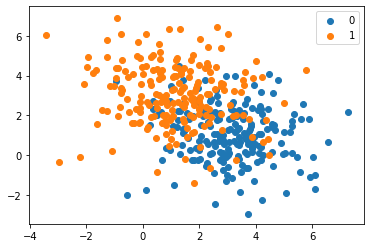

In [0]:
feats = X
target = y

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend()

##### Предсказание по одному новому значению

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=18)

model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [0]:
#Predict Output
predicted= model.predict([[4,0]])
print(predicted)

[0]


## Train-test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(300, 2) (300,)
(100, 2) (100,)


In [0]:
X_train[:20]

array([[ 2.36832961, -0.6390522 ],
       [ 3.61966079,  2.58721193],
       [ 5.06773287, -1.91347893],
       [ 4.22879059,  2.06124232],
       [ 2.96518637, -0.09624407],
       [ 2.66562766,  2.02928372],
       [ 1.44348943,  2.6188838 ],
       [ 3.40269464,  1.37118502],
       [-0.19280788,  4.98095849],
       [ 1.12304601,  3.97774504],
       [ 3.26999527,  3.9702093 ],
       [ 0.80952879,  1.05026492],
       [-0.31261702,  1.60768456],
       [ 2.89565561,  3.292758  ],
       [ 0.62378077,  4.82667054],
       [ 0.98254598,  3.50027294],
       [ 4.57597552,  0.17052989],
       [ 0.49021364,  2.39275675],
       [-0.06133332,  2.97997551],
       [ 1.25304082,  4.3853447 ]])

In [0]:
y_train[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

##### Обучаемся на данных train

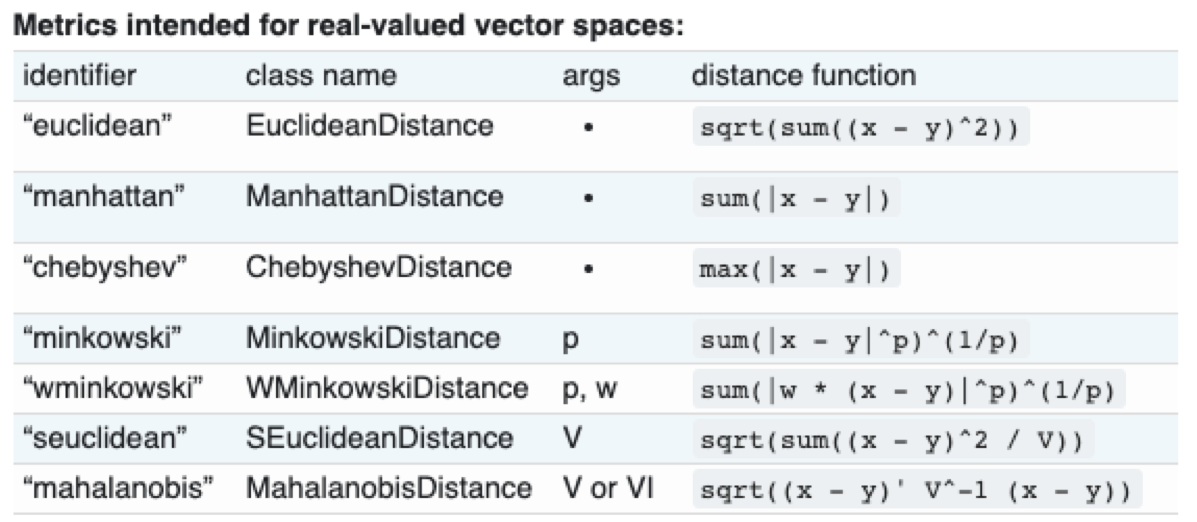

In [0]:
from IPython.display import Image
Image(filename='metrics.png')

$N = 1$ - количество соседей

$v = (2,2,2) - \text{ red or blue?}$

$v_1 = (-3,2,1) - \text{ red}$

$v_2 = (-1,2,3) - \text{ blue}$

$v_3 = (4,4,3) - \text{ red}$

Метрика "euclidian":

$euc(v, v_1) = \sqrt{(2-(-3))^2 + (2-2)^2+(2-1)^2} = \sqrt{26}$

$euc(v, v_2) = \sqrt{(2-(-1))^2 + (2-2)^2+(2-3)^2} = \sqrt{10}$

$euc(v, v_3) = \sqrt{(2-4)^2 + (2-4)^2+(2-3)^2} = \sqrt{9}$

ОТВЕТ: red

Метрика "manhatan":

$man(v, v_1) = |2-(-3)| + |2-2|+|2-1| = 6$

$man(v, v_2) = |2-(-1)| + |2-2|+|2-3| = 4$

$man(v, v_3) = |2-4| + |2-4|+|2-3| = 5$

ОТВЕТ: blue


In [0]:
model = KNeighborsClassifier(n_neighbors=18, metric='euclidean') #'euclidean'
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [0]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [0]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

print('Accuracy: ',accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred, normalize=False))



Accuracy:  0.85 85


## Cross-validation

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


for i in range(1,20):
    
    model = KNeighborsClassifier(n_neighbors=i, metric='euclidean') ##bevdvwww
    
    fold = KFold(n_splits=5, shuffle=True, random_state=5)
    scores = cross_val_score(estimator = model,X=X_train, y=y_train,cv=fold)
    print(scores)

NameError: ignored

In [0]:
print(scores)

[0.8    0.8625 0.825  0.8125 0.8   ]


In [0]:
print(scores.mean())

0.82


#### Метрики
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric

## Исследовать датасеты Wine и Iris, построить простейшие модели 

>>> from sklearn.datasets import load_wine
>>> data_wine = load_wine()
>>> print(data_wine.target)
>>> print(list(data_wine.target_names))
>>> print(data_wine.data.shape)

>>> from sklearn.datasets import load_iris
>>> data_iris = load_wine()
>>> data_iris.target
>>> list(data_iris.target_names)
>>> data_iris.data